In [75]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [90]:
#import dataset
data = pd.read_csv("spambase.csv")
data.head()
#data.count()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [94]:
#Describe Dataset
data.dtypes


word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [4]:
#Data Preparation
data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

# Data Modelling

## Classification

In [15]:
#Splitting dataset for classification
#creating test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data['class'],test_size=0.2, random_state=0)
#x_test = x_test.iloc[:,:-1]

In [16]:
x_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
36,0.00,0.0,0.00,0.0,2.94,0.00,0.00,0.00,0.00,0.00,...,0.0,0.436,0.436,0.000,0.873,0.000,0.0,4.142,12,29
706,0.00,0.0,0.00,0.0,0.84,1.27,0.42,0.00,0.00,0.42,...,0.0,0.097,0.097,1.171,0.244,0.390,0.0,26.405,363,977
1559,0.32,0.0,0.80,0.0,0.80,0.32,0.16,0.00,0.64,0.00,...,0.0,0.000,0.050,0.000,0.050,0.075,0.0,1.419,15,159
1349,0.18,0.0,0.09,0.0,0.36,0.09,0.00,0.36,0.09,0.00,...,0.0,0.000,0.059,0.029,0.029,0.014,0.0,4.192,48,566
3878,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.13,0.00,...,0.0,0.125,0.438,0.146,0.000,0.000,0.0,3.657,35,534


In [17]:
#creating validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=0)

In [18]:
#x_val.count()

In [19]:
x_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
438,0.00,0.00,0.00,0.0,1.31,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.251,0.000,1.007,0.000,0.0,1.440,8,36
321,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.67,0.0,0.67,...,0.0,0.170,0.511,0.085,0.511,0.000,0.0,4.617,27,217
448,0.12,0.12,0.24,0.0,1.34,0.12,0.0,0.12,0.0,0.00,...,0.0,0.061,0.020,0.000,0.041,0.041,0.0,2.351,69,254
4459,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,19.131,0.000,0.0,13.250,48,53
3500,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,1.96,...,0.0,0.000,0.373,0.000,0.000,0.000,0.0,1.857,11,26


In [21]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(2760, 57)
(920, 57)
(921, 57)


In [52]:
#standardizing datasets for classification
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled)
x_val_scaled = scaler.transform(x_val)
x_val_scaled = pd.DataFrame(x_val_scaled)

### Decision Tree

In [53]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [54]:
# structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 170, 51, -2.56982386e-01, 0.96232475, 2760, 2.760e+03)
 (  2, 145,  6, -1.83848463e-01, 0.61775685, 1632, 1.632e+03)
 (  3, 126, 52, -7.71169402e-02, 0.45238162, 1508, 1.508e+03)
 (  4,  99, 15, -1.73892006e-01, 0.35119077, 1407, 1.407e+03)
 (  5,  98, 26, -2.29724139e-01, 0.26208136, 1284, 1.284e+03)
 (  6,  91, 24, -3.13460872e-01, 0.339719  ,  903, 9.030e+02)
 (  7,  54, 55, -2.91435421e-01, 0.44661061,  591, 5.910e+02)
 (  8,  49,  7,  1.73588783e+00, 0.23016274,  428, 4.280e+02)
 (  9,  30, 11,  3.06016490e-01, 0.19914574,  420, 4.200e+02)
 ( 10,  29, 54, -1.18809063e-01, 0.12536979,  349, 3.490e+02)
 ( 11,  12, 56, -4.49156404e-01, 0.24602258,  147, 1.470e+02)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   92, 9.200e+01)
 ( 13,  28, 49, -5.29353008e-01, 0.49716776,   55, 5.500e+01)
 ( 14,  27,  2, -1.49928108e-01, 0.72192809,   30, 3.000e+01)
 ( 15,  26, 44, -1.29735893e-01, 0.8812909 ,   20, 2.000e+01)
 ( 16,  25, 56, -4.24175784e-01, 0.98522814,   14, 1.400e+01)
 ( 17,  

307

In [55]:
y_pred = classifier.predict(x_val_scaled)

[[517  39]
 [ 45 319]]


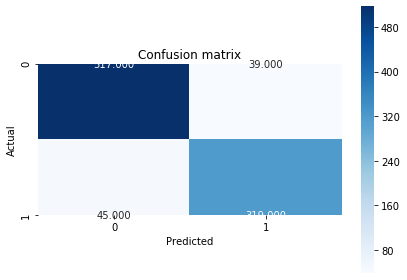

In [56]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [57]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.908695652173913 
Error =  0.09130434782608698 
Precision = [0.91992883 0.89106145] 
Recall =  [0.92985612 0.87637363] 
F1 Score =  [0.92486583 0.88365651]


### k Nearest Neighbors

In [58]:
classifier = KNeighborsClassifier(n_neighbors = 3, weights='distance')  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [59]:
y_pred = classifier.predict(x_val_scaled)

[[530  26]
 [ 48 316]]


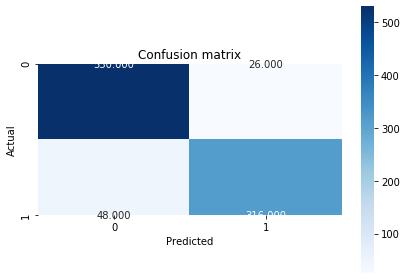

In [60]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [61]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.9195652173913044 
Error =  0.08043478260869563 
Precision = [0.91695502 0.92397661] 
Recall =  [0.95323741 0.86813187] 
F1 Score =  [0.93474427 0.89518414]


In [62]:
#selecting optimal value of K
#cols = [3,5,6,7,8,9,11,12]
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i,weights='distance')  
    classifier.fit(x_train_scaled,y_train)
    y_pred = classifier.predict(x_val_scaled)
    accuracy = metrics.accuracy_score(y_val,y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_val, y_pred, average = None)
    recall = metrics.recall_score(y_val, y_pred, average = None)
    F1_score = metrics.f1_score(y_val, y_pred, average = None)
    print([i,accuracy, error, precision, recall, F1_score])

[1, 0.9119565217391304, 0.08804347826086956, array([0.90877797, 0.91740413]), array([0.94964029, 0.8543956 ]), array([0.92875989, 0.88477952])]
[2, 0.9119565217391304, 0.08804347826086956, array([0.90877797, 0.91740413]), array([0.94964029, 0.8543956 ]), array([0.92875989, 0.88477952])]
[3, 0.9195652173913044, 0.08043478260869563, array([0.91695502, 0.92397661]), array([0.95323741, 0.86813187]), array([0.93474427, 0.89518414])]
[4, 0.9228260869565217, 0.07717391304347831, array([0.91882556, 0.92961877]), array([0.95683453, 0.87087912]), array([0.93744493, 0.89929078])]
[5, 0.9163043478260869, 0.08369565217391306, array([0.91943958, 0.91117479]), array([0.9442446 , 0.87362637]), array([0.93167702, 0.89200561])]
[6, 0.9173913043478261, 0.08260869565217388, array([0.91811847, 0.91618497]), array([0.94784173, 0.87087912]), array([0.93274336, 0.89295775])]
[7, 0.9141304347826087, 0.08586956521739131, array([0.91623037, 0.91066282]), array([0.9442446 , 0.86813187]), array([0.93002657, 0.8888

### Naive Bayes

In [63]:
classifier = GaussianNB()  
classifier.fit(x_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_pred = classifier.predict(x_val_scaled)

[[410 146]
 [ 13 351]]


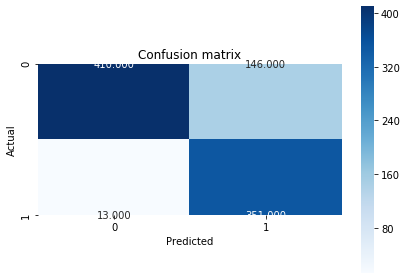

In [65]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [66]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.8271739130434783 
Error =  0.17282608695652169 
Precision = [0.96926714 0.70623742] 
Recall =  [0.73741007 0.96428571] 
F1 Score =  [0.83758938 0.81533101]


### SVM

In [67]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
y_pred = classifier.predict(x_val_scaled)

[[532  24]
 [ 47 317]]


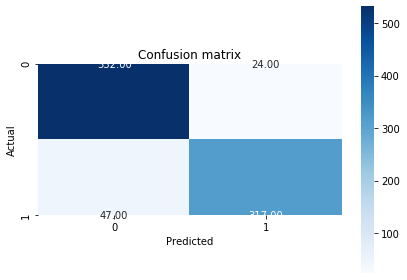

In [69]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [70]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.9228260869565217 
Error =  0.07717391304347831 
Precision = [0.91882556 0.92961877] 
Recall =  [0.95683453 0.87087912] 
F1 Score =  [0.93744493 0.89929078]


## Clustering

In [78]:
#Splitting dataset for clustering
data_x = data.iloc[:,:-1]
#data_x.head()
data_y = data['class']
#data_y.head()

In [79]:
#standardizing datasets for clustering
scaler = StandardScaler()
scaler.fit(data_x)
data_x_scaled = scaler.transform(data_x)
data_x_scaled = pd.DataFrame(data_x_scaled)

### K Means

In [101]:
clustering = KMeans(n_clusters = 2,init = 'random',n_init = 10, random_state = 0).fit(data_x_scaled)
clusters = clustering.labels_
print("Clusters are : ",np.unique(clusters))
print("Number of clusters = ",len(clusters))

Clusters are :  [0 1]
Number of clusters =  4601


In [102]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled,clusters)
print("Adjusted Random Index =",adjusted_rand_index, "\nSilhouette Coefficient = ",silhouette_coefficient)

Adjusted Random Index = -0.00494969888751084 
Silhouette Coefficient =  0.659630943933575


[[  34    0]
 [2754 1813]]


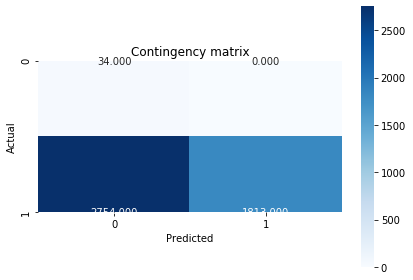

In [82]:
cont_matrix = metrics.cluster.contingency_matrix(clusters, data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

In [2]:
#Data Exploration
plt.title('histogram')
plt.xlabel('column 0')
plt.ylabel('Frequency')
plt.hist(original_data.iloc[:,[0]], bins = 6)



NameError: name 'plt' is not defined

In [ ]:
# Plot box plot
tips = sns.load_dataset('tips')
ax = sns.boxplot(x = 'class', y = 'word_freq_our', data = original_data, whis = 10)
ax.set(title = 'Box plot ', xlabel = 'Class', ylabel = '')

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
for i in range(0,6):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[i], whis=10)
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(6,12):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(12,18):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(18,24):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(24,30):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(30,36):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(36,42):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(42,48):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(48,54):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()

In [ ]:
num_columns = len(original_data.columns)
fig, axes = plt.subplots(1, 6, figsize = (10, 5))
j = 0
for i in range(54,56):
    sns.boxplot(x='class', y = original_data.columns[i], data = original_data, orient = 'v', ax = axes[j], whis=10)
    j+=1
plt.tight_layout()